In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset into the notebook

In [2]:
data = pd.read_csv(r'C:\Users\RAJAT SAHU\Data_Science\Project\InnoProject\ML_Projrct_Concrete_Strength_Prediction\Concrete_Data.csv')
data.head(2)

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


### 2. Print the shape of the data

In [3]:
data.shape

(1030, 9)

### 3. List out the feature variables and their data-types

In [4]:
X = data.iloc[:,:-1]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


### 4. List out response variable and its data type

In [5]:
y = data.columns[-1]
print('Response Veriable Name : ',y, ' \nData Types : ', data[str(y)].dtypes)

Response Veriable Name :  Concrete compressive strength(MPa, megapascals)   
Data Types :  float64


### 5. Check for null values in the feature variables

In [6]:
data.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

# NOTE :  --

--> As this is regression one 

Base model can be == only those which can perform reg techniques like
    
    linear = regression technique 
    
    log = classification technique
    
    knn = both regression & clasification can perform
    
    decision tree = both regression & clasification can perform
    
    random forest = both regression & clasification can perform


from sklearn.neighbors import KNeighborsRegressor = for regression 

from sklearn.tree import DecisionTreeRegressor 

from sklearn.ensemble import RandomForestRegressor

--

from sklearn.neighbors import KNeighborsClassifier = for classification

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [8]:
### Project Summary
project_summary = {}

In [9]:
# Base model Prepration
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,accuracy_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split

X = data.iloc[:,:-1]
y = data.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=32)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Base Model r2 score : ',r2_score(y_test,y_pred)*100,'%')
print('Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Base Model MAE : ',mean_absolute_error(y_test,y_pred))

Base Model r2 score :  56.712782280530895 %
Base Model MSE :  100.32662082350035
Base Model MAE :  7.773955200633321


Text(0.5, 1.0, 'Decision Tree')

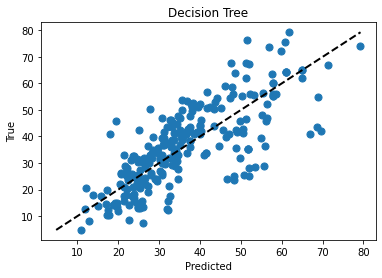

In [10]:
# Auxiliary Line
plt.scatter(y_pred, y_test, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree")

Base Model : Underfitting, Overfitting condition with Train :  0.6262915131124852
Base Model : Uderfitting Overfitting condition with Test :  0.5671278228053089

Note : Model is in Under-fitting case


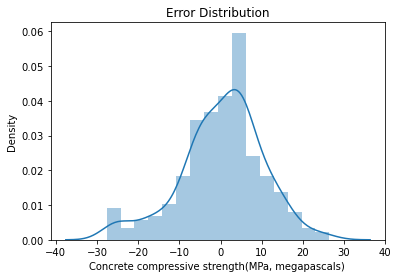

In [11]:
# Base Model Overfitting and underfitting case
print('Base Model : Underfitting, Overfitting condition with Train : ',linreg.score(X_train,y_train))
print('Base Model : Uderfitting Overfitting condition with Test : ',linreg.score(X_test,y_test))
print("\nNote : Model is in Under-fitting case")

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [12]:
# Project Summary : Base Model 1st 
project_summary[0] = {}
project_summary[0]['Model'] = 'Base 1st LinerRegression'
project_summary[0]['R2'] = r2_score(y_test,y_pred)
project_summary[0]['MSE'] = mean_squared_error(y_test,y_pred)
project_summary[0]['MAE'] = mean_absolute_error(y_test,y_pred)
project_summary[0]['Description'] = 'Model performance without remove Outliers'


project_summary

{0: {'Model': 'Base 1st LinerRegression',
  'R2': 0.5671278228053089,
  'MSE': 100.32662082350035,
  'MAE': 7.773955200633321,
  'Description': 'Model performance without remove Outliers'}}

In [13]:
data.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


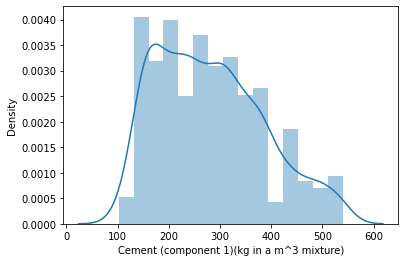

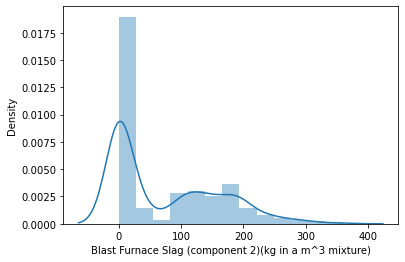

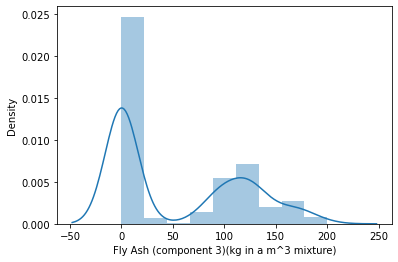

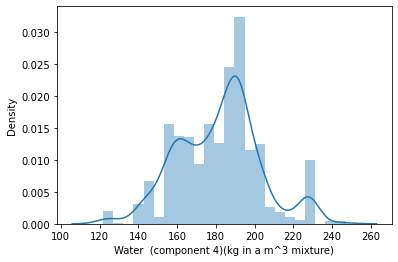

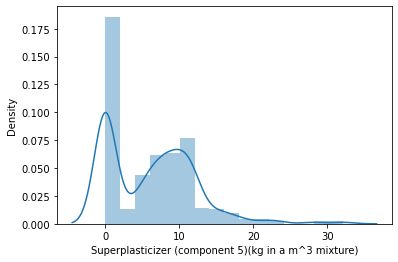

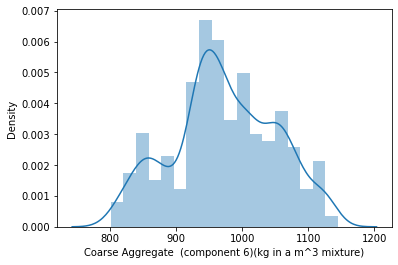

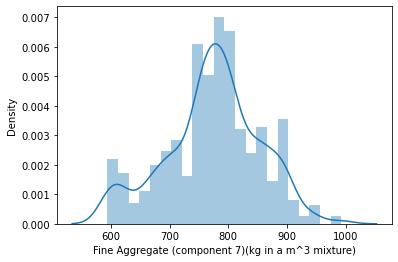

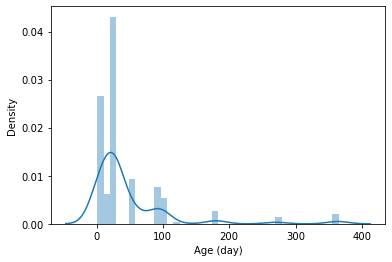

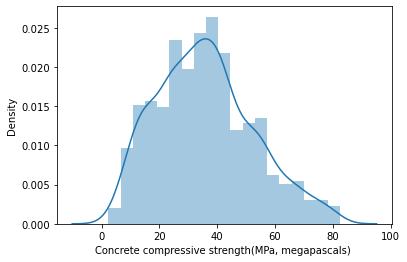

In [14]:
for col in data.columns:
    sns.distplot(data[str(col)])
    plt.show()

### 6. Check for outliers
    1. IQR Method
    2. Z score

In [15]:
# 1. IQR method
for  col in data.columns:
    Q1 = data[str(col)].quantile(0.25)
    Q3 = data[str(col)].quantile(0.75)
    IQR = Q3-Q1
    # Max and Lower range
    lr = Q1-1.5*IQR
    ur = Q3+1.5*IQR
    print('Upper range Outliers "'+str(col)+'": ',data[str(col)][data[str(col)]>ur].count())
    print('Lower range Outliers "'+str(col)+'": ',data[str(col)][data[str(col)]<lr].count())
    print("")

Upper range Outliers "Cement (component 1)(kg in a m^3 mixture)":  0
Lower range Outliers "Cement (component 1)(kg in a m^3 mixture)":  0

Upper range Outliers "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":  2
Lower range Outliers "Blast Furnace Slag (component 2)(kg in a m^3 mixture)":  0

Upper range Outliers "Fly Ash (component 3)(kg in a m^3 mixture)":  0
Lower range Outliers "Fly Ash (component 3)(kg in a m^3 mixture)":  0

Upper range Outliers "Water  (component 4)(kg in a m^3 mixture)":  4
Lower range Outliers "Water  (component 4)(kg in a m^3 mixture)":  5

Upper range Outliers "Superplasticizer (component 5)(kg in a m^3 mixture)":  10
Lower range Outliers "Superplasticizer (component 5)(kg in a m^3 mixture)":  0

Upper range Outliers "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":  0
Lower range Outliers "Coarse Aggregate  (component 6)(kg in a m^3 mixture)":  0

Upper range Outliers "Fine Aggregate (component 7)(kg in a m^3 mixture)":  5
Lower range Outliers

In [16]:
# Z score Technique based outliers detection
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3

### 7. Treat outliers. What is your strategy? What other strategies can be used?

#### Note : We have to two common diffrent strategy to remove outliers.
    1. IQR 
    2. Z score

### 8. Perform univariate analysis (be as creative as possible in your analysis)
    1. Visualize the shape of the distribution of data.Is every feature variable normally distributed? Why is normal distribution important for data?
    2. Is the data distribution skewed? If highly skewed, do you still find outliers which you did not treat? Draw box and whiskers plot of each of the feature variables
    3. How do the distributions look in terms of variation? Which features are widely spread and which are kind of concentrated towards the mean?

In [17]:
data.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

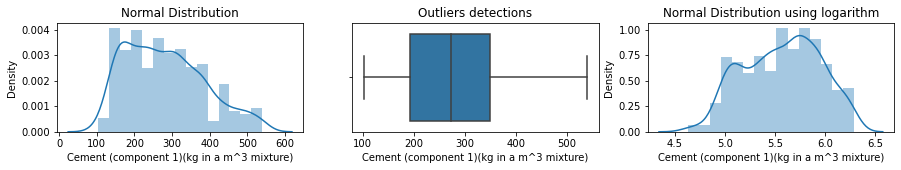

In [18]:
# Multiverient Analysis :  Features 1st
col = 'Cement (component 1)(kg in a m^3 mixture)'
plt.figure(figsize=(15,2))
plt.subplot(131)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(132)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.subplot(133)
sns.distplot(np.log(data[col]))
plt.title('Normal Distribution using logarithm')
plt.show()

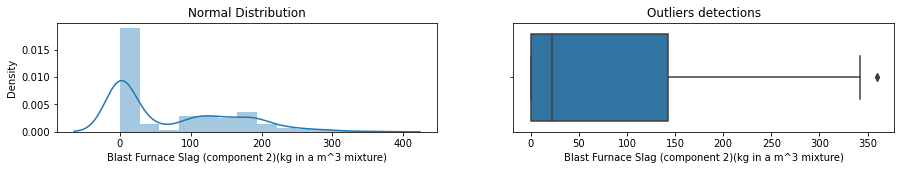

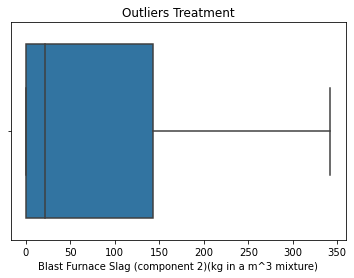

In [19]:
# Multiverient Analysis :  Features 2nd
col = 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)'
plt.figure(figsize=(15,2))
plt.subplot(121)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(122)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.show()

# Outliers handling
Q1 = data[str(col)].quantile(0.25)
Q3 = data[str(col)].quantile(0.75)
IQR = Q3-Q1
# Max and Lower range
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
data.drop(data[data[col] > ur ].index, inplace = True)
# After remove  Outliers
sns.boxplot(data[col])
plt.title('Outliers Treatment')
plt.show()

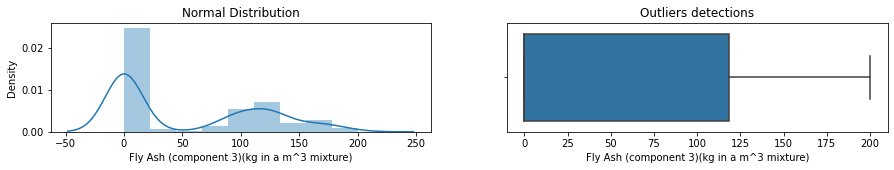

In [20]:
# Multiverient Analysis :  Features 3rd
col = 'Fly Ash (component 3)(kg in a m^3 mixture)'
plt.figure(figsize=(15,2))
plt.subplot(121)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(122)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.show()

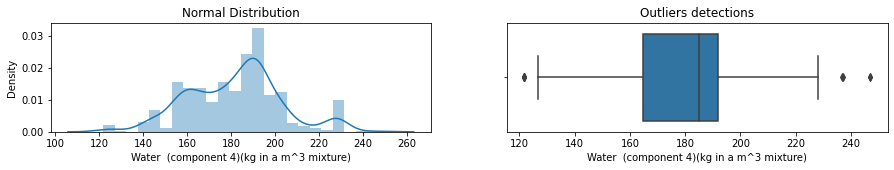

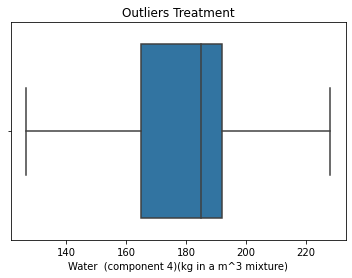

In [21]:
# Multiverient Analysis :  Features 4th
col = 'Water  (component 4)(kg in a m^3 mixture)'
plt.figure(figsize=(15,2))
plt.subplot(121)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(122)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.show()

# Outliers handling
Q1 = data[str(col)].quantile(0.25)
Q3 = data[str(col)].quantile(0.75)
IQR = Q3-Q1
# Max and Lower range
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
data.drop(data[data[col] > ur ].index, inplace = True)
data.drop(data[data[col] < lr ].index, inplace = True)
# After remove  Outliers
sns.boxplot(data[col])
plt.title('Outliers Treatment')
plt.show()

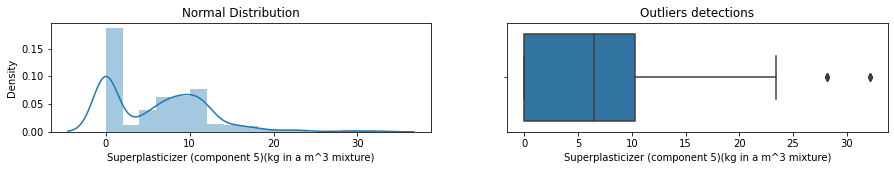

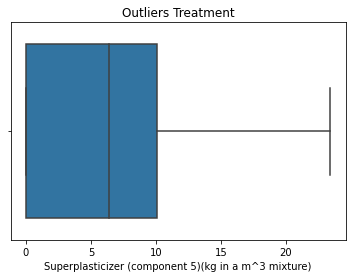

In [22]:
# Multiverient Analysis :  Features 5th
col = 'Superplasticizer (component 5)(kg in a m^3 mixture)'
plt.figure(figsize=(15,2))
plt.subplot(121)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(122)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.show()

# Outliers handling
Q1 = data[str(col)].quantile(0.25)
Q3 = data[str(col)].quantile(0.75)
IQR = Q3-Q1
# Max and Lower range
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
data.drop(data[data[col] > ur ].index, inplace = True)
# After remove  Outliers
sns.boxplot(data[col])
plt.title('Outliers Treatment')
plt.show()

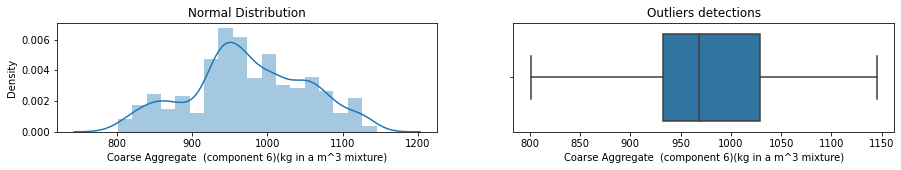

In [23]:
# Multiverient Analysis :  Features 6th
col = 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)'
plt.figure(figsize=(15,2))
plt.subplot(121)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(122)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.show()

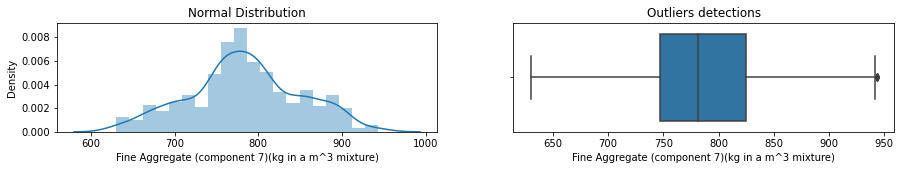

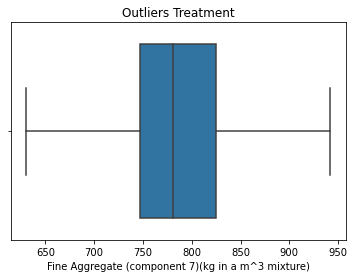

In [27]:
# Multiverient Analysis :  Features 7th
col = 'Fine Aggregate (component 7)(kg in a m^3 mixture)'
plt.figure(figsize=(15,2))
plt.subplot(121)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(122)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.show()

# Outliers handling
Q1 = data[str(col)].quantile(0.25)
Q3 = data[str(col)].quantile(0.75)
IQR = Q3-Q1
# Max and Lower range
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
data.drop(data[data[col] > ur ].index, inplace = True)
data.drop(data[data[col] < lr ].index, inplace = True)
# After remove  Outliers
sns.boxplot(data[col])
plt.title('Outliers Treatment')
plt.show()

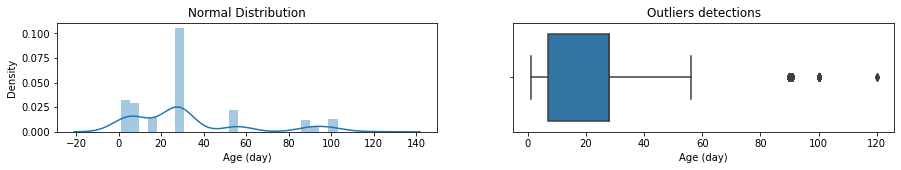

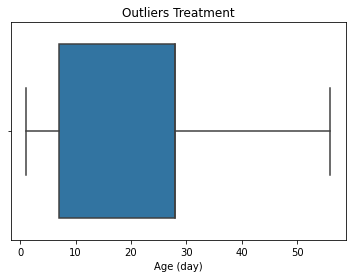

In [29]:
# Multiverient Analysis :  Features 8th
col = 'Age (day)'
plt.figure(figsize=(15,2))
plt.subplot(121)
sns.distplot(data[col])
plt.title('Normal Distribution')
plt.subplot(122)
sns.boxplot(data[col])
plt.title('Outliers detections')
plt.show()

# Outliers handling
Q1 = data[str(col)].quantile(0.25)
Q3 = data[str(col)].quantile(0.75)
IQR = Q3-Q1
# Max and Lower range
lr = Q1-1.5*IQR
ur = Q3+1.5*IQR
data.drop(data[data[col] > ur ].index, inplace = True)
# After remove  Outliers
sns.boxplot(data[col])
plt.title('Outliers Treatment')
plt.show()

## After remove all Outliers : Now apply the 2nd Base Model (Removed all outliers). Process called Outliers Treatment

In [30]:
# Features and Target Selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Regression Technique
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=31)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Standred Scaller Base Model Accuarcy : ',r2_score(y_test,y_pred)*100,'%')
print('Standred Scaller Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Standred Scaller Base Model MAE : ',mean_absolute_error(y_test,y_pred))

Standred Scaller Base Model Accuarcy :  83.57376636019312 %
Standred Scaller Base Model MSE :  46.22573560662089
Standred Scaller Base Model MAE :  5.135642565379541


Text(0.5, 1.0, 'Decision Tree')

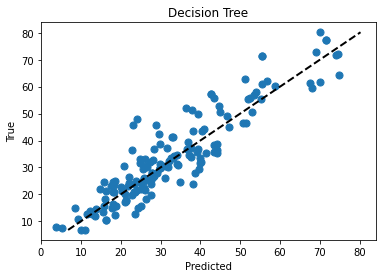

In [31]:
# Auxiliary Line
plt.scatter(y_pred, y_test, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree")

After Remove the Outliers : Overfitting and underfitting case with Train :  0.8022324743593112
After Remove the Outliers : Overfitting and underfitting case with Test :  0.8357376636019311

Note : Model is in Under-fitting case


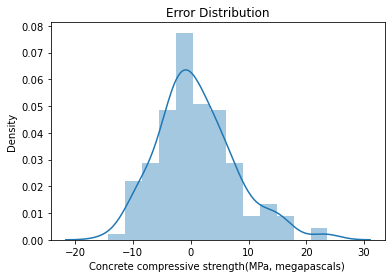

In [32]:
# After Remove the Outliers : Overfitting and underfitting case
print('After Remove the Outliers : Overfitting and underfitting case with Train : ',linreg.score(X_train,y_train))
print('After Remove the Outliers : Overfitting and underfitting case with Test : ',linreg.score(X_test,y_test))
print("\nNote : Model is in Under-fitting case")

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [33]:
# Project Summary : Base Model 1st 
project_summary[1] = {}
project_summary[1]['Model'] = 'Base Model 2nd LinerRegression'
project_summary[1]['R2'] = r2_score(y_test,y_pred)
project_summary[1]['MSE'] = mean_squared_error(y_test,y_pred)
project_summary[1]['MAE'] = mean_absolute_error(y_test,y_pred)
project_summary[1]['Description'] = 'Model performance removed Outliers'


project_summary

{0: {'Model': 'Base 1st LinerRegression',
  'R2': 0.5671278228053089,
  'MSE': 100.32662082350035,
  'MAE': 7.773955200633321,
  'Description': 'Model performance without remove Outliers'},
 1: {'Model': 'Base Model 2nd LinerRegression',
  'R2': 0.8357376636019311,
  'MSE': 46.22573560662089,
  'MAE': 5.135642565379541,
  'Description': 'Model performance removed Outliers'}}

In [34]:
data2 = data.copy()
data2

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.81
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


## 9. Perform bi-variate analysis (be as creative as possible)
    1. Try creating correlation matrices. See if there are variables which are strongly or weakly related.
    2. If there are variables showing high correlation, what corrective action is needed? Why is this matter of concern? What if we do not treat the variables showing high degree of correlation?

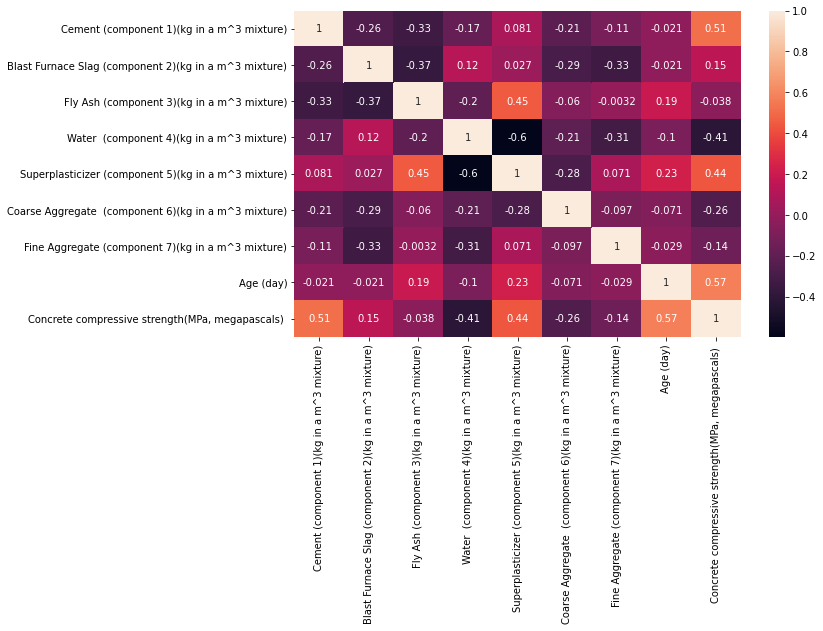

In [35]:
# correlation Metrics
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [36]:
## Varience Inflaction Method
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data['Columns'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data.sort_values('VIF',ascending=False)
vif_data

,Columns,VIF
0,Cement (component 1)(kg in a m^3 mixture),13.479937
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,3.414433
2,Fly Ash (component 3)(kg in a m^3 mixture),4.928692
3,Water (component 4)(kg in a m^3 mixture),100.773027
4,Superplasticizer (component 5)(kg in a m^3 mix...,6.417889
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,92.362935
6,Fine Aggregate (component 7)(kg in a m^3 mixture),103.730379
7,Age (day),3.449148


In [37]:
# Higher Mulitcolinerity Features :
vif_data.sort_values('VIF',ascending=False).head(4)
# We have to remove it and then try to create model.

,Columns,VIF
6,Fine Aggregate (component 7)(kg in a m^3 mixture),103.730379
3,Water (component 4)(kg in a m^3 mixture),100.773027
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,92.362935
0,Cement (component 1)(kg in a m^3 mixture),13.479937


In [38]:
# We have to drop Higher Multi colinerirty verible (Standred range is 0-10 max.)
data.drop(['Fine Aggregate (component 7)(kg in a m^3 mixture)','Water  (component 4)(kg in a m^3 mixture)'
           ,'Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Cement (component 1)(kg in a m^3 mixture)'],axis=1,inplace=True)

In [39]:
# Features and Target Selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Regression Technique
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=31)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Standred Scaller Base Model Accuarcy : ',r2_score(y_test,y_pred)*100,'%')
print('Standred Scaller Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Standred Scaller Base Model MAE : ',mean_absolute_error(y_test,y_pred))

Standred Scaller Base Model Accuarcy :  59.56588948090793 %
Standred Scaller Base Model MSE :  113.78728339860704
Standred Scaller Base Model MAE :  8.591364066510213


Text(0.5, 1.0, 'Decision Tree')

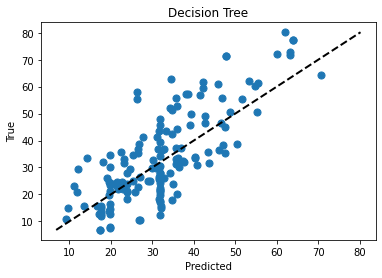

In [40]:
# Auxiliary Line
plt.scatter(y_pred, y_test, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree")

After Multicolinerity Veriable removed : Overfitting and underfitting case with Train :  0.5047193624496062
After Multicolinerity Veriable removed : Overfitting and underfitting case with Test :  0.5956588948090793

Note : Model is in Under-fitting case


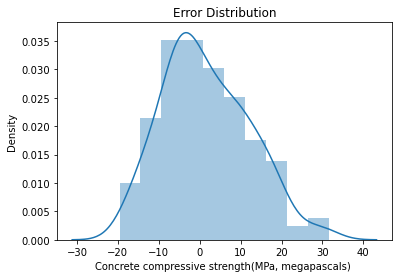

In [41]:
# After Multicolinerity Veriable removed : Overfitting and underfitting case
print('After Multicolinerity Veriable removed : Overfitting and underfitting case with Train : ',linreg.score(X_train,y_train))
print('After Multicolinerity Veriable removed : Overfitting and underfitting case with Test : ',linreg.score(X_test,y_test))
print("\nNote : Model is in Under-fitting case")

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [42]:
# Project Summary : Base Model 3rd 
project_summary[2] = {}
project_summary[2]['Model'] = 'Base Model 3rd LinerRegression'
project_summary[2]['R2'] = r2_score(y_test,y_pred)
project_summary[2]['MSE'] = mean_squared_error(y_test,y_pred)
project_summary[2]['MAE'] = mean_absolute_error(y_test,y_pred)
project_summary[2]['Description'] = 'Model performance After complete the Features Selection like VIF and Corr.'


project_summary

{0: {'Model': 'Base 1st LinerRegression',
  'R2': 0.5671278228053089,
  'MSE': 100.32662082350035,
  'MAE': 7.773955200633321,
  'Description': 'Model performance without remove Outliers'},
 1: {'Model': 'Base Model 2nd LinerRegression',
  'R2': 0.8357376636019311,
  'MSE': 46.22573560662089,
  'MAE': 5.135642565379541,
  'Description': 'Model performance removed Outliers'},
 2: {'Model': 'Base Model 3rd LinerRegression',
  'R2': 0.5956588948090793,
  'MSE': 113.78728339860704,
  'MAE': 8.591364066510213,
  'Description': 'Model performance After complete the Features Selection like VIF and Corr.'}}

In [43]:
### Scalling Technique : Standred Scaller Technique
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

# Features and Target Selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Fit features with Standred sScalling 
X = ss.fit_transform(X)

# Regression Technique
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=31)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Standred Scaller Base Model Accuarcy : ',r2_score(y_test,y_pred)*100,'%')
print('Standred Scaller Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Standred Scaller Base Model MAE : ',mean_absolute_error(y_test,y_pred))

Standred Scaller Base Model Accuarcy :  59.565889480907956 %
Standred Scaller Base Model MSE :  113.78728339860696
Standred Scaller Base Model MAE :  8.591364066510211


## Scalling Technique
    1. Standred Scaller
    2. Normalized Scaller
    3. Robust Scaller

In [44]:
### Scalling Technique : Standred Scaller Technique
from sklearn.preprocessing import MinMaxScaler
Norm = MinMaxScaler()

# Features and Target Selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Fit features with Standred sScalling 
X = Norm.fit_transform(X)

# Regression Technique
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Normalization Scaller Base Model Accuarcy : ',r2_score(y_test,y_pred)*100,'%')
print('Normalization Scaller Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Normalization Scaller Base Model MAE : ',mean_absolute_error(y_test,y_pred))

Normalization Scaller Base Model Accuarcy :  45.72712964630535 %
Normalization Scaller Base Model MSE :  143.67617283687892
Normalization Scaller Base Model MAE :  9.236818278506348


In [45]:
### Scalling Technique : Robust Scaller Technique
from sklearn.preprocessing import RobustScaler
rob = RobustScaler()

# Features and Target Selection 
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# Fit features with Standred sScalling 
X = rob.fit_transform(X)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=40)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Robust Scaller Base Model Accuarcy : ',r2_score(y_test,y_pred)*100,'%')
print('Robust Scaller Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Robust Scaller Base Model MAE : ',mean_absolute_error(y_test,y_pred))

Robust Scaller Base Model Accuarcy :  45.72712964630538 %
Robust Scaller Base Model MSE :  143.67617283687886
Robust Scaller Base Model MAE :  9.23681827850635


In [46]:
data.head(2)

,Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,0.0,0.0,2.5,28,79.99
1,0.0,0.0,2.5,28,61.89


#### we have to check and apply some Regularization because we want to reduce MSE.
    1. Lasso Regression (L1)
    2. Ridge Regression (L2)

In [47]:
# Features selection
X = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)

# Lasso Regularization
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=0.1,max_iter=100,tol=0.1)
lasso_reg.fit(X_train,y_train)
y_pred = lasso_reg.predict(X_test)
print('Lasso (L1) Regularization Technique : Mean Squared Error : ',np.mean((y_pred - y_test)**2))
print('Lasso (L1) Regularization Technique : R2 square : ',r2_score(y_test,y_pred)*100,'%')
print('Lasso (L1) Regularization Technique : Mean Squared Error : ',mean_squared_error(y_test,y_pred)*100,'%')
print('Lasso (L1) Regularization Technique : Mean Absolute Error : ',mean_absolute_error(y_test,y_pred)*100,'%')


MSE = []
MAE = []
R2 = []
for i in range(100):
    # Lasso Regularization
    i = i/100
    lasso_reg = linear_model.Lasso(alpha=i,max_iter=100,tol=0.1)
    lasso_reg.fit(X_train,y_train)
    #print('Lasso (L1) Regularization Technique : Score '+str(i)+': ',np.mean((y_pred - y_test)**2))
    MSE.append(np.mean((y_pred - y_test)**2))
    MAE.append(mean_squared_error(y_test,y_pred))
    R2.append(r2_score(y_test,y_pred))
    
m_MSE = min(MSE)
m_MAE = min(MAE)
m_R2 = min(R2)

# Project Summary : Lasso Regularization 
project_summary[3] = {}
project_summary[3]['Model'] = 'Lasso Regularization'
project_summary[3]['R2'] = m_R2
project_summary[3]['MSE'] = m_MSE
project_summary[3]['MAE'] = m_MAE
project_summary[3]['Description'] = 'Lasso Regularization Technique, we are getting Min Accuracy'


project_summary[3]

Lasso (L1) Regularization Technique : Mean Squared Error :  44.7702008484475
Lasso (L1) Regularization Technique : R2 square :  80.85208846187241 %
Lasso (L1) Regularization Technique : Mean Squared Error :  4477.02008484475 %
Lasso (L1) Regularization Technique : Mean Absolute Error :  527.177685755047 %


{'Model': 'Lasso Regularization',
 'R2': 0.8085208846187241,
 'MSE': 44.7702008484475,
 'MAE': 44.7702008484475,
 'Description': 'Lasso Regularization Technique, we are getting Min Accuracy'}

In [86]:
# Ridge Regularization
from sklearn import linear_model
ridge_reg = linear_model.Ridge(alpha=0.1,max_iter=100,tol=0.1)
ridge_reg.fit(X_train,y_train)
y_pred = ridge_reg.predict(X_test)
print('Ridge (L2) Regularization Technique : Score : ',np.mean((y_test - y_pred)**2))

MSE = []
MAE = []
R2 = []

for i in range(100):
    # Ridge Regularization
    i = i/100
    ridge_reg = linear_model.Ridge(alpha=i,max_iter=100,tol=0.1)
    ridge_reg.fit(X_train,y_train)
    y_pred = ridge_reg.predict(X_test)
    #print('Ridge (L2) Regularization Technique : MSE : '+str(i)+'',np.mean((y_test - y_pred)**2))
    MSE.append(np.mean((y_test - y_pred)**2))
    MAE.append(mean_squared_error(y_test,y_pred))
    R2.append(r2_score(y_test,y_pred))
    
m_MSE = min(MSE)
m_MAE = min(MAE)
m_R2 = min(R2)

# Project Summary : Ridge Regularization 
project_summary[4] = {}
project_summary[4]['Model'] = 'Ridge Regularization'
project_summary[4]['R2'] = m_R2
project_summary[4]['MSE'] = m_MSE
project_summary[4]['MAE'] = m_MAE
project_summary[4]['Description'] = 'Ridge Regularization Technique, we are getting Min Accuracy'


project_summary

Ridge (L2) Regularization Technique : Score :  46.877461843301894


{0: {'Model': 'Base 1st LinerRegression',
  'R2': 0.5671278228053089,
  'MSE': 100.32662082350035,
  'MAE': 7.773955200633321,
  'Description': 'Model performance without remove Outliers'},
 1: {'Model': 'Base Model 2nd LinerRegression',
  'R2': 0.8357376636019311,
  'MSE': 46.22573560662089,
  'MAE': 5.135642565379541,
  'Description': 'Model performance removed Outliers'},
 2: {'Model': 'Base Model 3rd LinerRegression',
  'R2': 0.5956588948090793,
  'MSE': 113.78728339860704,
  'MAE': 8.591364066510213,
  'Description': 'Model performance After complete the Features Selection like VIF and Corr.'},
 3: {'Model': 'Lasso Regularization',
  'R2': 0.8085208846187241,
  'MSE': 44.7702008484475,
  'MAE': 44.7702008484475,
  'Description': 'Lasso Regularization Technique, we are getting Min Accuracy'},
 5: {'Model': 'Remove Multicolinerity',
  'R2': 0.574330721469426,
  'MSE': 119.78933184982208,
  'MAE': 8.48711046947127,
  'Description': 'After remove all Multicolinerity features using OLS

Text(0.5, 1.0, 'Decision Tree')

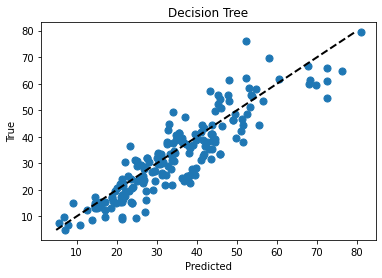

In [84]:
# Auxiliary Line
plt.scatter(y_pred, y_test, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree")

### Cross Validation Score 

In [49]:
# Features selection 
X = data2.iloc[:,:-1]
y = data2.iloc[:,-1]

# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)

#### cross Validation
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
score = cross_val_score(lm,X_train,y_train,scoring='r2',cv=10)
print('Cross Validation score is :', score)
print("\nCross Validation Score is : ",np.mean(score))

Cross Validation score is : [0.75682884 0.88043827 0.79574376 0.7470612  0.73395554 0.76614195
 0.76454512 0.79457748 0.84690639 0.8128192 ]

Cross Validation Score is :  0.7899017732292991


In [50]:
data2 = data2.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'Features1',
            'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'Features2',
            'Fly Ash (component 3)(kg in a m^3 mixture)':'Features3',
            'Water  (component 4)(kg in a m^3 mixture)':'Features4',
            'Superplasticizer (component 5)(kg in a m^3 mixture)':'Features5',
            'Coarse Aggregate  (component 6)(kg in a m^3 mixture)':'Features6',
            'Fine Aggregate (component 7)(kg in a m^3 mixture)':'Features7',
            'Age (day)':'Features8','Concrete compressive strength(MPa, megapascals) ':'Target'})

In [51]:
### Ordinary Least Square Error (OLS model for the Features elimination)
import statsmodels.api as sm
import statsmodels.formula.api as smf

olsmodel = smf.ols(formula='Target~Features1+Features2+Features3+Features4+Features5+Features6+Features7+Features8',data=data2).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     407.8
Date:                Sun, 22 Aug 2021   Prob (F-statistic):          3.88e-270
Time:                        21:47:18   Log-Likelihood:                -2627.3
No. Observations:                 775   AIC:                             5273.
Df Residuals:                     766   BIC:                             5314.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.1467     22.106      0.549      0.583     -31.249      55.543
Features1      0.1120      0.007     16.098      0.000       0.098       0.126
Features2      0.0843      0.008     10.185      0.000       0.068       0.101
Features3      0.0484      0.010      4.761      0.000       0.028       0.068
Features4     -0.2202      0.034     -6.462      0.000      -0.287      -0.153
Features5      0.0860      0.083      1.032      0.302      -0.078       0.250
Features6      0.0036      0.008      0.459      0.647      -0.012       0.019
Features7      0.0044      0.009      0.501      0.616      -0.013       0.022
Features8      0.5690      0.017     32.753      0.000       0.535       0.603
==============================================================================
Omnibus:                       32.159   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.667
Skew:                           0.372   Prob(JB):                     1.21e-10
Kurtosis:                       3.927   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
olsmodel = smf.ols(formula='Target~Features1+Features2+Features3+Features4+Features8',data=data2).fit()
olsmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     653.8
Date:                Sun, 22 Aug 2021   Prob (F-statistic):          4.88e-274
Time:                        21:47:18   Log-Likelihood:                -2627.9
No. Observations:                 775   AIC:                             5268.
Df Residuals:                     769   BIC:                             5296.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.7585      3.406      7.269      0.000      18.072      31.445
Features1      0.1101      0.003     33.956      0.000       0.104       0.117
Features2      0.0824      0.004     22.770      0.000       0.075       0.089
Features3      0.0479      0.005      9.130      0.000       0.038       0.058
Features4     -0.2448      0.016    -15.575      0.000      -0.276      -0.214
Features8      0.5711      0.017     33.253      0.000       0.537       0.605
==============================================================================
Omnibus:                       30.660   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.752
Skew:                           0.364   Prob(JB):                     5.21e-10
Kurtosis:                       3.890   Cond. No.                     4.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
# Features and Target Selection 
X = data2[['Features1','Features2','Features3','Features4','Features5']]
y = data2['Target']

# Regression Technique
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=31)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Standred Scaller Base Model Accuarcy : ',r2_score(y_test,y_pred)*100,'%')
print('Standred Scaller Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Standred Scaller Base Model MAE : ',mean_absolute_error(y_test,y_pred))

multi_R2 = r2_score(y_test,y_pred)
multi_MAE = mean_squared_error(y_test,y_pred)
multi_MSE = mean_absolute_error(y_test,y_pred)

Standred Scaller Base Model Accuarcy :  57.4330721469426 %
Standred Scaller Base Model MSE :  119.78933184982208
Standred Scaller Base Model MAE :  8.48711046947127


Text(0.5, 1.0, 'Decision Tree')

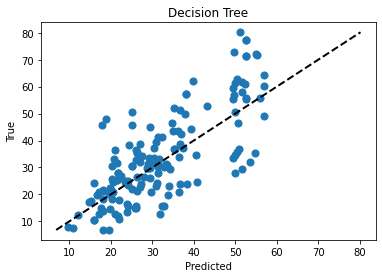

In [54]:
# Auxiliary Line
plt.scatter(y_pred, y_test, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree")

High Multicolinerity veriable :  Overfitting and underfitting case with Train :  0.5326966615277258
High Multicolinerity veriable :  Overfitting and underfitting case with Test :  0.574330721469426

Note : Model is in Under-fitting case


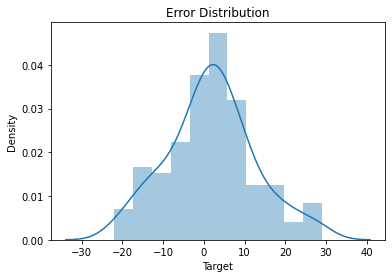

In [55]:
# After Multicolinerity Veriable removed : Overfitting and underfitting case
print('High Multicolinerity veriable :  Overfitting and underfitting case with Train : ',linreg.score(X_train,y_train))
print('High Multicolinerity veriable :  Overfitting and underfitting case with Test : ',linreg.score(X_test,y_test))
print("\nNote : Model is in Under-fitting case")

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [56]:
# Project Summary : Remove all Multicolinearity Variable Regularization 
project_summary[5] = {}
project_summary[5]['Model'] = 'Remove Multicolinerity'
project_summary[5]['R2'] = multi_R2
project_summary[5]['MSE'] = multi_MAE
project_summary[5]['MAE'] = multi_MSE
project_summary[5]['Description'] = 'After remove all Multicolinerity features using OLS method aplha is greater than to the 0.05 signnificance values'

project_summary[5]

{'Model': 'Remove Multicolinerity',
 'R2': 0.574330721469426,
 'MSE': 119.78933184982208,
 'MAE': 8.48711046947127,
 'Description': 'After remove all Multicolinerity features using OLS method aplha is greater than to the 0.05 signnificance values'}

#### 10. What is the type of machine learning problem at hand? (Supervised or Unsupervised?) Why?
    1. Supervised Learning
        Regression : 
        Target Veriable : Continous Variable
        Supervised learning, as the name indicates, has the presence of a supervisor as a teacher. Basically supervised learning is when we teach or train the machine using data that is well labeled. Which means some data is already tagged with the correct answer. After that, the machine is provided with a new set of examples(data) so that the supervised learning algorithm analyses the training data(set of training examples) and produces a correct outcome from labeled data. 
        
        Classification :
        Target Veriable : Yes/No
        A classification problem is when the output variable is a category, such as “Red” or “blue” or “disease” and “no disease”.
        
    2. Unsupervised Learning
        unsupervised learning is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance.
            

In [57]:
### 11. What is the category of the machine learning problem at hand? (Classification or Regression?) Why ??

In [58]:
data2.head(2)

,Features1,Features2,Features3,Features4,Features5,Features6,Features7,Features8,Target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


### 2nd Algorithm :  "Random Forest Regression"
    

In [59]:
data3 = data2.copy()
data3

,Features1,Features2,Features3,Features4,Features5,Features6,Features7,Features8,Target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
11,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,28.02
14,304.0,76.0,0.0,228.0,0.0,932.0,670.0,28,47.81
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [60]:
# Features and Target Selection 
X = data3.iloc[:,:-1]
y = data3.iloc[:,-1]

# Regression Technique
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=31)
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
print('Standred Scaller Base Model Accuarcy : ',r2_score(y_test,y_pred)*100,'%')
print('Standred Scaller Base Model MSE : ',mean_squared_error(y_test,y_pred))
print('Standred Scaller Base Model MAE : ',mean_absolute_error(y_test,y_pred))

rf_R2 = r2_score(y_test,y_pred)
rf_MSE = mean_squared_error(y_test,y_pred)
rf_MAE = mean_absolute_error(y_test,y_pred)

Standred Scaller Base Model Accuarcy :  83.57376636019312 %
Standred Scaller Base Model MSE :  46.22573560662089
Standred Scaller Base Model MAE :  5.135642565379541


Text(0.5, 1.0, 'Decision Tree')

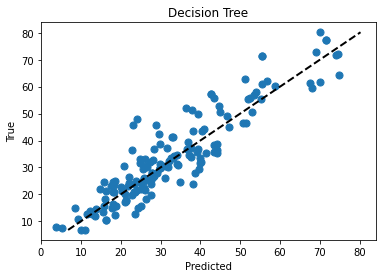

In [61]:
# Auxiliary Line
plt.scatter(y_pred, y_test, s=50)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Decision Tree")

Underfitting, Overfitting condition with Train :  0.8022324743593112
Uderfitting Overfitting condition with Test :  0.8357376636019311


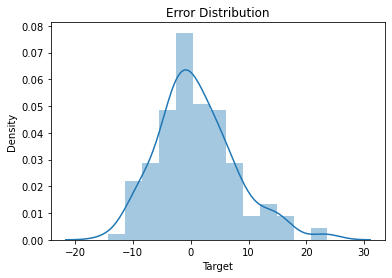

In [62]:
# Overfitting and under fitting Test case
# Note  : if we will find high distance between the train and test values means case is overfitting and that time,
            #we have to apply Some  regularization technique and then we have to penaling the best fit line with the helo of 'Alpha' values.
print('Underfitting, Overfitting condition with Train : ',linreg.score(X_train,y_train))
print('Uderfitting Overfitting condition with Test : ',linreg.score(X_test,y_test))

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [63]:
# Project Summary : Random Forest Technique
project_summary[6] = {}
project_summary[6]['Model'] = 'With Multicolinerity Veriables'
project_summary[6]['R2'] = rf_R2
project_summary[6]['MSE'] = rf_MSE
project_summary[6]['MAE'] = rf_MAE
project_summary[6]['Description'] = 'If we will not clear all multicolierity variable from the DataFrame'

project_summary[6]

{'Model': 'With Multicolinerity Veriables',
 'R2': 0.8357376636019311,
 'MSE': 46.22573560662089,
 'MAE': 5.135642565379541,
 'Description': 'If we will not clear all multicolierity variable from the DataFrame'}

In [64]:
data3.head(2)

,Features1,Features2,Features3,Features4,Features5,Features6,Features7,Features8,Target
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89


## KNN Technique

    Estimator   R2score         MSE       MAE
0           1  0.567133  101.209668  6.888660
1           2  0.570174  100.498587  7.531727
2           3  0.589943   95.876420  7.457732
3           4  0.615663   89.862847  7.235490
4           5  0.638082   84.620973  6.997928
5           6  0.655006   80.663838  7.005885
6           7  0.644132   83.206334  7.207813
7           8  0.607765   91.709516  7.636888
8           9  0.590487   95.749343  7.837423
9          10  0.592374   95.308125  7.728804
10         11  0.583759   97.322440  7.769110
11         12  0.581063   97.952663  7.801143
12         13  0.571717  100.138002  7.909461
13         14  0.557919  103.363997  8.014219
14         15  0.552069  104.731730  8.056464
15         16  0.544824  106.425764  8.227899
16         17  0.533395  109.098069  8.356777
17         18  0.525214  111.010989  8.445530
18         19  0.513766  113.687539  8.541701


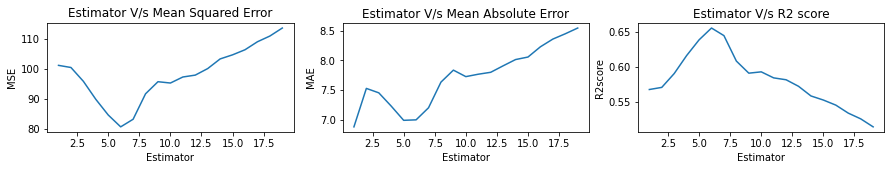

In [65]:
### KNN Regression Technique 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
estimator = []
score = []
mse = []
mae = []
for  i in range(1,20):
    knn = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    # Features selection 
    X = data3.iloc[:,:-1]
    y = data3.iloc[:,-1]
    # Split and Fit model
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    r2Score = r2_score(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    estimator.append(i)
    score.append(r2Score)
    mse.append(MSE)
    mae.append(MAE)
Knn = pd.DataFrame()
Knn['Estimator'] = estimator
Knn['R2score'] = score
Knn['MSE'] = mse
Knn['MAE'] = mae
print(Knn)

### Plot 
plt.figure(figsize=(15,2))
plt.subplot(131)
sns.lineplot(Knn['Estimator'],Knn['MSE'])
plt.title('Estimator V/s Mean Squared Error')
plt.subplot(132)
sns.lineplot(Knn['Estimator'],Knn['MAE'])
plt.title('Estimator V/s Mean Absolute Error')
plt.subplot(133)
sns.lineplot(Knn['Estimator'],Knn['R2score'])
plt.title('Estimator V/s R2 score')
plt.show()

In [66]:
knn = KNeighborsRegressor(n_neighbors=6, weights='uniform')
# Features selection 
X = data3.iloc[:,:-1]
y = data3.iloc[:,-1]
# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
r2Score = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)

print(r2Score,MSE,MAE)

0.6550062319705194 80.66383770045819 7.005884879725086


KNN :  Overfitting and underfitting case with Train :  0.8078624191322444
KNN :  Overfitting and underfitting case with Test :  0.8140345792360741

Note : Model is in Under-fitting case


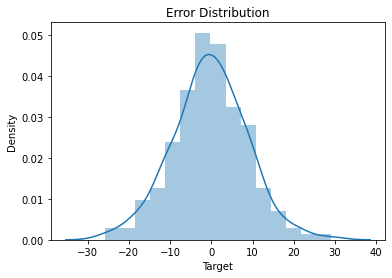

In [67]:
# KNN : Overfitting and underfitting case
print('KNN :  Overfitting and underfitting case with Train : ',linreg.score(X_train,y_train))
print('KNN :  Overfitting and underfitting case with Test : ',linreg.score(X_test,y_test))
print("\nNote : Model is in Under-fitting case")

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [68]:
# Project Summary : KNN Technique
project_summary[7] = {}
project_summary[7]['Model'] = 'K-nearest neighbors'
project_summary[7]['R2'] = r2Score
project_summary[7]['MSE'] = MSE
project_summary[7]['MAE'] = MAE
project_summary[7]['Description'] = 'Using KNN we are getting Max accuarcy with Mentioned MSE and MAE'

project_summary[7]

{'Model': 'K-nearest neighbors',
 'R2': 0.6550062319705194,
 'MSE': 80.66383770045819,
 'MAE': 7.005884879725086,
 'Description': 'Using KNN we are getting Max accuarcy with Mentioned MSE and MAE'}

## Decision Tree Concept

#### Information Gain is calculated for a split by subtracting the weighted entropies of each branch from the original entropy. When training a Decision Tree using these metrics, the best split is chosen by maximizing Information Gain.

    Information Entropy
    Case 1st : we will split the data into two vector X = {Red,Red,Red,Red} and y = {Yellow,Red,Red,Black,Black,Yellow}
    
                        Before the Split We have Entropy is : -(7/10.log2.7/10 + 2/10.log2.2/10 + 2/10.log2.2/10)
                                                        
                                                         E(Before)   : 0.12
        
    Entropy Concept -- in X, we have a simple one type of catgory data, means have a Low Entropy in dataset.
                       in Y, we have a Different-2 type of catgory data, means have a High Entropy in dataset
        
                        Formula : -∑p.log2.p  :  where P is the randomly picking the element
                        X = -(P0.log2.P0)
                        X = -(1.log2.1) = 0
                        X = first Branch Entropy is 0
                        
                        Y = -(P0.log2.P0 + P1.log2.P1 + P2.log2.P2)
                        Y = -(2/6.log2.2/6 + 2/6.log2.2/6 + 2/6.log2.2/6)
                        Y = 0.38
                        Y = Second Branch Entropy is 0.38
                        
    Information Gain :  X(Entropy) = 0 and Y(Entropy) = 0.38 
                        Now we have Both Branch Entropy and now  we can determine the quality of split by weighting of entropy
                        of each branch by how many element it has.
                        X(weight) = 0.4
                        Y(weight) = 0.6
                        
                        E(split) = 0.4*0 + 0.6*0.38 = 0.228
                        
                        "Note : Information Gain = how much Entropy we removed"
                        
                        Gain = 0.12 - 0.38 = 0.26 (higher Information Gain = more Entropy removed)
                        
                        "The best split is chosen by maximizing Information Gain."
                        
                        
#### Recap Information Gain : Information Gain is calculated for a split by subtracting the weighted entropies of each branch from the original entropy.  

###### Refrence : https://www.analyticsvidhya.com/blog/2021/03/how-to-select-best-split-in-decision-trees-using-information-gain/

    Max Depth   R2score         MSE        MAE
0           1  0.219932  182.389558  10.572854
1           2  0.480766  121.403385   8.621173
2           3  0.622426   88.281523   7.112319
3           4  0.722538   64.874106   6.212698
4           5  0.769452   53.905036   5.921850
5           6  0.803940   45.841231   5.186510
6           7  0.791907   48.654624   5.132156
7           8  0.810286   44.357456   4.837402
8           9  0.824737   40.978692   4.474356
9          10  0.798599   47.090021   4.533167
10         11  0.821957   41.628560   4.210136
11         12  0.807190   45.081438   4.321526
12         13  0.822196   41.572885   4.145975
13         14  0.802134   46.263611   4.357806
14         15  0.825517   40.796270   4.067363
15         16  0.822248   41.560632   4.143909
16         17  0.816490   42.906959   4.245077
17         18  0.799188   46.952251   4.411675
18         19  0.818044   42.543480   4.231366


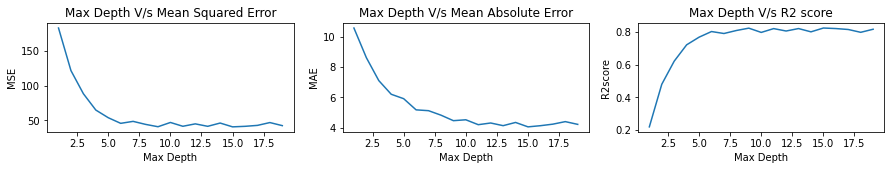

In [69]:
### Decision Tree Regression Technique 
from sklearn.tree import DecisionTreeRegressor,export_graphviz
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
estimator = []
score = []
mse = []
mae = []
for  i in range(1,20):
    dtr = DecisionTreeRegressor(random_state=0,max_depth=i)
    # Features selection 
    X = data3.iloc[:,:-1]
    y = data3.iloc[:,-1]
    # Split and Fit model
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)
    dtr.fit(X_train,y_train)
    y_pred = dtr.predict(X_test)
    r2Score = r2_score(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    estimator.append(i)
    score.append(r2Score)
    mse.append(MSE)
    mae.append(MAE)
dtr = pd.DataFrame()
dtr['Max Depth'] = estimator
dtr['R2score'] = score
dtr['MSE'] = mse
dtr['MAE'] = mae
print(dtr)

### Plot 
plt.figure(figsize=(15,2))
plt.subplot(131)
sns.lineplot(dtr['Max Depth'],dtr['MSE'])
plt.title('Max Depth V/s Mean Squared Error')
plt.subplot(132)
sns.lineplot(dtr['Max Depth'],dtr['MAE'])
plt.title('Max Depth V/s Mean Absolute Error')
plt.subplot(133)
sns.lineplot(dtr['Max Depth'],dtr['R2score'])
plt.title('Max Depth V/s R2 score')
plt.show()

In [70]:
dtr = DecisionTreeRegressor(random_state=0,max_depth=13)
# Features selection 
X = data3.iloc[:,:-1]
y = data3.iloc[:,-1]
# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)
r2Score = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)

print(r2Score,MAE,MSE)

0.8221955881476717 4.14597471772214 41.57288493065198


Decision Tree :  Overfitting and underfitting case with Train :  0.8078624191322444
Decision Tree :  Overfitting and underfitting case with Test :  0.8140345792360741

Note : Model is in Under-fitting case


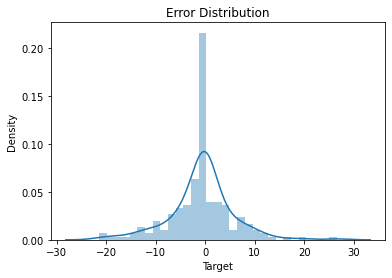

In [71]:
# After Multicolinerity Veriable removed : Overfitting and underfitting case
print('Decision Tree :  Overfitting and underfitting case with Train : ',linreg.score(X_train,y_train))
print('Decision Tree :  Overfitting and underfitting case with Test : ',linreg.score(X_test,y_test))
print("\nNote : Model is in Under-fitting case")

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [72]:
# Project Summary :  Decision Tree algo
project_summary[8] = {}
project_summary[8]['Model'] = 'Decision Tree Regresssion Tech'
project_summary[8]['R2'] = r2Score
project_summary[8]['MSE'] = MSE
project_summary[8]['MAE'] = MAE
project_summary[8]['Description'] = 'Using Decision Tree Technique, we are getting Max accuarcy at hyper-perameter : 15 with Mentioned MSE and MAE'

project_summary[8]

{'Model': 'Decision Tree Regresssion Tech',
 'R2': 0.8221955881476717,
 'MSE': 41.57288493065198,
 'MAE': 4.14597471772214,
 'Description': 'Using Decision Tree Technique, we are getting Max accuarcy at hyper-perameter : 15 with Mentioned MSE and MAE'}

In [73]:
features_column = ['Features1', 'Features2', 'Features3', 'Features4', 'Features5','Features6', 'Features7', 'Features8']
target_column = ['Target']

In [74]:
!pip install pydotplus

In [75]:
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz 

dot_data = export_graphviz(dtr,feature_names=features_column)
dot_data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Features8 <= 21.0\\nmse = 283.252\\nsamples = 581\\nvalue = 33.179"] ;\n1 [label="Features5 <= 8.35\\nmse = 139.865\\nsamples = 219\\nvalue = 22.459"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Features8 <= 10.5\\nmse = 61.662\\nsamples = 145\\nvalue = 17.281"] ;\n1 -> 2 ;\n3 [label="Features1 <= 389.0\\nmse = 49.836\\nsamples = 114\\nvalue = 15.135"] ;\n2 -> 3 ;\n4 [label="Features1 <= 295.9\\nmse = 27.199\\nsamples = 105\\nvalue = 13.868"] ;\n3 -> 4 ;\n5 [label="Features1 <= 161.0\\nmse = 19.624\\nsamples = 79\\nvalue = 12.511"] ;\n4 -> 5 ;\n6 [label="Features8 <= 5.0\\nmse = 12.352\\nsamples = 14\\nvalue = 8.099"] ;\n5 -> 6 ;\n7 [label="Features4 <= 197.75\\nmse = 5.826\\nsamples = 7\\nvalue = 5.583"] ;\n6 -> 7 ;\n8 [label="Features6 <= 922.6\\nmse = 3.673\\nsamples = 4\\nvalue = 7.15"] ;\n7 -> 8 ;\n9 [label="Features2 <= 163.0\\nmse = 0.731\\nsamples = 2\\nvalue = 5.425"] ;\n8 -> 9 ;\n10 [label="mse = 0

[Text(281.90480458388595, 524.1857142857143, 'X[7] <= 21.0\nmse = 283.252\nsamples = 581\nvalue = 33.179'),
 Text(146.0072633454907, 485.3571428571429, 'X[4] <= 8.35\nmse = 139.865\nsamples = 219\nvalue = 22.459'),
 Text(108.20385029840848, 446.52857142857147, 'X[7] <= 10.5\nmse = 61.662\nsamples = 145\nvalue = 17.281'),
 Text(82.828125, 407.70000000000005, 'X[0] <= 389.0\nmse = 49.836\nsamples = 114\nvalue = 15.135'),
 Text(60.07534814323607, 368.8714285714286, 'X[0] <= 295.9\nmse = 27.199\nsamples = 105\nvalue = 13.868'),
 Text(35.29127984084881, 330.0428571428572, 'X[0] <= 161.0\nmse = 19.624\nsamples = 79\nvalue = 12.511'),
 Text(12.087533156498674, 291.2142857142857, 'X[7] <= 5.0\nmse = 12.352\nsamples = 14\nvalue = 8.099'),
 Text(6.413793103448276, 252.3857142857143, 'X[3] <= 197.75\nmse = 5.826\nsamples = 7\nvalue = 5.583'),
 Text(3.946949602122016, 213.55714285714288, 'X[5] <= 922.6\nmse = 3.673\nsamples = 4\nvalue = 7.15'),
 Text(1.973474801061008, 174.72857142857146, 'X[1] <=

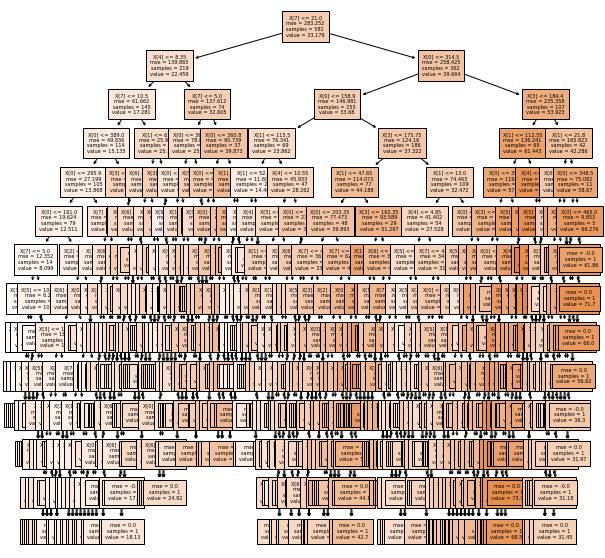

In [76]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dtr,filled=True,fontsize=5)

### Random Forest Concept
#### The random forest is a model made up of many decision trees. Rather than just simply averaging the prediction of trees


    Estimator   R2score        MSE       MAE
0           5  0.877196  28.713209  3.792585
1           6  0.884886  26.915086  3.667765
2           7  0.893729  24.847511  3.521214
3           8  0.899501  23.497940  3.378733
4           9  0.903644  22.529313  3.363164
5          10  0.903825  22.486916  3.376971
6          11  0.903384  22.589989  3.386888
7          12  0.902105  22.889013  3.416663
8          13  0.902449  22.808708  3.431870
9          14  0.904391  22.354596  3.360282
10         15  0.905285  22.145478  3.374957
11         16  0.905565  22.080035  3.351208
12         17  0.905772  22.031568  3.359135
13         18  0.908288  21.443329  3.334023
14         19  0.907371  21.657920  3.340784


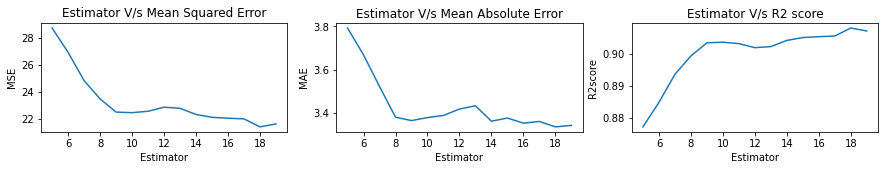

In [77]:
### Random Forest Regression Technique 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
estimator = []
score = []
mse = []
mae = []
for  i in range(5,20):
    rfr = RandomForestRegressor(n_estimators=i, random_state=0)
    # Features selection 
    X = data3.iloc[:,:-1]
    y = data3.iloc[:,-1]
    # Split and Fit model
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)
    rfr.fit(X_train,y_train)
    y_pred = rfr.predict(X_test)
    r2Score = r2_score(y_test,y_pred)
    MSE = mean_squared_error(y_test,y_pred)
    MAE = mean_absolute_error(y_test,y_pred)
    estimator.append(i)
    score.append(r2Score)
    mse.append(MSE)
    mae.append(MAE)
RandomF = pd.DataFrame()
RandomF['Estimator'] = estimator
RandomF['R2score'] = score
RandomF['MSE'] = mse
RandomF['MAE'] = mae
print(RandomF)

### Plot 
plt.figure(figsize=(15,2))
plt.subplot(131)
sns.lineplot(RandomF['Estimator'],RandomF['MSE'])
plt.title('Estimator V/s Mean Squared Error')
plt.subplot(132)
sns.lineplot(RandomF['Estimator'],RandomF['MAE'])
plt.title('Estimator V/s Mean Absolute Error')
plt.subplot(133)
sns.lineplot(RandomF['Estimator'],RandomF['R2score'])
plt.title('Estimator V/s R2 score')
plt.show()

In [78]:
rfr = RandomForestRegressor(n_estimators=18, random_state=0)
# Features selection 
X = data3.iloc[:,:-1]
y = data3.iloc[:,-1]
# Split and Fit model
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=41)
rfr.fit(X_train,y_train)
y_pred = rfr.predict(X_test)
r2Score = r2_score(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)

print(r2Score,MSE,MAE)

0.908288336809204 21.443328547979156 3.3340231004200063


Random forest :  Overfitting and underfitting case with Train :  0.8078624191322444
Random Forest :  Overfitting and underfitting case with Test :  0.8140345792360741

Note : Model is in Under-fitting case


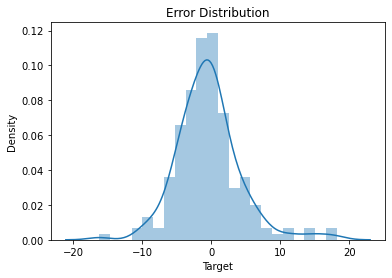

In [79]:
# After Multicolinerity Veriable removed : Overfitting and underfitting case
print('Random forest :  Overfitting and underfitting case with Train : ',linreg.score(X_train,y_train))
print('Random Forest :  Overfitting and underfitting case with Test : ',linreg.score(X_test,y_test))
print("\nNote : Model is in Under-fitting case")

# Always Error should be normally distributed.
Error = (y_test-y_pred)
sns.distplot(Error)
plt.title("Error Distribution")
plt.show()

In [80]:
# Project Summary : Random Forest algo
project_summary[9] = {}
project_summary[9]['Model'] = 'Random Forest Regresssion Tech'
project_summary[9]['R2'] = r2Score
project_summary[9]['MSE'] = MSE
project_summary[9]['MAE'] = MAE
project_summary[9]['Description'] = 'Using Random Forest Technique, we are getting Max accuarcy at hyper-perameter : 18 with Mentioned MSE and MAE'

project_summary[9]

{'Model': 'Random Forest Regresssion Tech',
 'R2': 0.908288336809204,
 'MSE': 21.443328547979156,
 'MAE': 3.3340231004200063,
 'Description': 'Using Random Forest Technique, we are getting Max accuarcy at hyper-perameter : 18 with Mentioned MSE and MAE'}

In [107]:
import json
sorted_json_data = json.dumps(project_summary, sort_keys=True)
finalJson = json.loads(sorted_json_data)
finalJson

{'0': {'Description': 'Model performance without remove Outliers',
  'MAE': 7.773955200633321,
  'MSE': 100.32662082350035,
  'Model': 'Base 1st LinerRegression',
  'R2': 0.5671278228053089},
 '1': {'Description': 'Model performance removed Outliers',
  'MAE': 5.135642565379541,
  'MSE': 46.22573560662089,
  'Model': 'Base Model 2nd LinerRegression',
  'R2': 0.8357376636019311},
 '2': {'Description': 'Model performance After complete the Features Selection like VIF and Corr.',
  'MAE': 8.591364066510213,
  'MSE': 113.78728339860704,
  'Model': 'Base Model 3rd LinerRegression',
  'R2': 0.5956588948090793},
 '3': {'Description': 'Lasso Regularization Technique, we are getting Min Accuracy',
  'MAE': 44.7702008484475,
  'MSE': 44.7702008484475,
  'Model': 'Lasso Regularization',
  'R2': 0.8085208846187241},
 '4': {'Description': 'Ridge Regularization Technique, we are getting Min Accuracy',
  'MAE': 46.877456455662696,
  'MSE': 46.87745645566268,
  'Model': 'Ridge Regularization',
  'R2':

In [109]:
Model,R2,MAE,MSE,Description = [],[],[],[],[]
for i in range(len(finalJson)):
    list = project_summary[i]
    Model.append(list['Model'])
    R2.append(list['R2'])
    MSE.append(list['MSE'])
    MAE.append(list['MAE'])
    Description.append(list['Description'])
df = pd.DataFrame()
df['Model'] = Model
df['R2'] = R2
df['MSE'] = MSE
df['MAE'] = MAE
df['Description'] = Description
df

,Model,R2,MSE,MAE,Description
0,Base 1st LinerRegression,0.567128,100.326621,7.773955,Model performance without remove Outliers
1,Base Model 2nd LinerRegression,0.835738,46.225736,5.135643,Model performance removed Outliers
2,Base Model 3rd LinerRegression,0.595659,113.787283,8.591364,Model performance After complete the Features ...
3,Lasso Regularization,0.808521,44.770201,44.770201,"Lasso Regularization Technique, we are getting..."
4,Ridge Regularization,0.799508,46.877456,46.877456,"Ridge Regularization Technique, we are getting..."
5,Remove Multicolinerity,0.574331,119.789332,8.487110,After remove all Multicolinerity features usin...
6,With Multicolinerity Veriables,0.835738,46.225736,5.135643,If we will not clear all multicolierity variab...
7,K-nearest neighbors,0.655006,80.663838,7.005885,Using KNN we are getting Max accuarcy with Men...
8,Decision Tree Regresssion Tech,0.822196,41.572885,4.145975,"Using Decision Tree Technique, we are getting ..."
9,Random Forest Regresssion Tech,0.908288,21.443329,3.334023,"Using Random Forest Technique, we are getting ..."


In [110]:
### Case 1st : if we want higher accuracy Model as compare to other model:
df.sort_values('R2',ascending=False).head(1)

,Model,R2,MSE,MAE,Description
9,Random Forest Regresssion Tech,0.908288,21.443329,3.334023,"Using Random Forest Technique, we are getting ..."


In [111]:
### Case 2nd : if we want higher accuracy and Lower Means Squared Error as compare to other model:
df.sort_values(['R2','MSE'],ascending=False).head(1)

,Model,R2,MSE,MAE,Description
9,Random Forest Regresssion Tech,0.908288,21.443329,3.334023,"Using Random Forest Technique, we are getting ..."


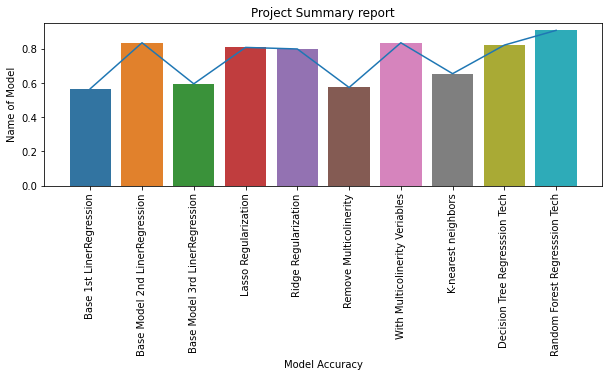

In [112]:
plt.figure(figsize=(10,3))
sns.barplot(df.Model,df.R2)
sns.lineplot(df.Model,df.R2)
plt.xticks(rotation=90)
plt.title('Project Summary report')
plt.xlabel('Model Accuracy')
plt.ylabel('Name of Model')
plt.show()

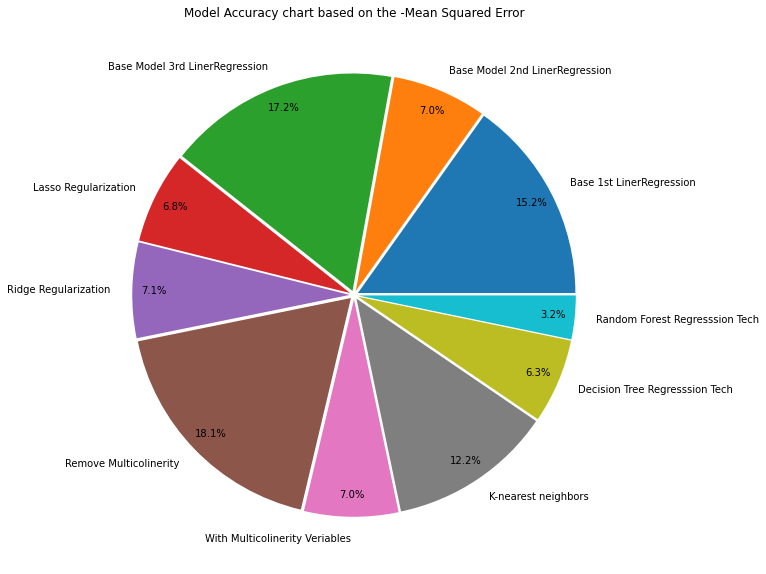

In [113]:
plt.figure(figsize=(10,10))
lables = df.Model.unique()
plt.pie(df.MSE,autopct="%.1f%%",labels=lables,pctdistance=0.9,explode=[0.02]*10)
plt.title('Model Accuracy chart based on the -Mean Squared Error')
plt.show()

In [ ]:
#Final Analysis